In [20]:
import os
data_dir = 'D:\python_code\stock\leading'
fname = os.path.join(data_dir, '1070829_2.csv')
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:-1]
print(header)
print(len(lines))

['date', 'composite', 'm1b', 'manu_and_service_employ', 'electri_use', 'manu_sale', 'non_darm_employ', 'export', 'unemploy', 'labor_cost', 'finance_taibor_rate', 'stock']
415


In [21]:
lines

['Jan-84,22.15,615,0.25,2.54,25.89,6087,94.91,2.34,107.94,8.1,793',
 'Feb-84,22.44,628,-0.44,2.32,19.93,5994,76.52,2.75,113.58,8.45,864',
 'Mar-84,22.71,602,0.54,2.46,26.3,5948,99.2,2.09,97.13,7.23,882',
 'Apr-84,22.88,597,0.82,2.72,25.88,5898,103.59,2.01,101.97,6.51,900',
 'May-84,22.92,603,1.13,2.69,27.13,5962,114.16,2.11,98.5,5.05,932',
 'Jun-84,22.84,617,0.7,3.11,26.39,5999,107.75,2.23,101.4,5.9,900',
 'Jul-84,22.69,625,2.45,3.05,26.29,5995,115.71,2.52,102.71,6.78,890',
 'Aug-84,22.53,626,0.07,3.2,26.45,6016,108.61,3.02,103.14,5.47,908',
 'Sep-84,22.41,632,-0.78,3.03,24.58,6067,94.58,3.03,111.6,6.7,878',
 'Oct-84,22.35,628,-0.05,3.03,24.81,6083,103.97,2.77,111.68,5.04,858',
 'Nov-84,22.36,630,-0.25,2.98,25.54,6102,97.29,2.25,109.09,6.05,817',
 'Dec-84,22.42,639,0.34,2.59,26.94,6117,93.29,2.21,107.94,6.61,847',
 'Jan-85,22.45,656,1.85,2.72,25.68,6243,108.04,2.03,108.43,6.59,823',
 'Feb-85,22.37,706,-0.45,2.76,21.88,6196,82.78,2.15,138,8.35,786',
 'Mar-85,22.18,672,-0.19,2.22,26.39,6

In [22]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = line.split(',')[1:]
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

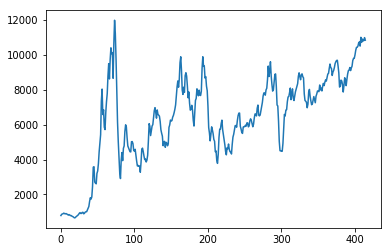

In [23]:
from matplotlib import pyplot as plt
stock = float_data[:, 10] 
#<1> temperature (in degrees Celsius)
plt.plot(range(len(stock)), stock)
plt.show()

In [24]:
float_data[0]

array([2.2150e+01, 6.1500e+02, 2.5000e-01, 2.5400e+00, 2.5890e+01,
       6.0870e+03, 9.4910e+01, 2.3400e+00, 1.0794e+02, 8.1000e+00,
       7.9300e+02])

In [25]:
"""mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std"""

'mean = float_data[:200000].mean(axis=0)\nfloat_data -= mean\nstd = float_data[:200000].std(axis=0)\nfloat_data /= std'

In [26]:
float_data

array([[ 2.2150e+01,  6.1500e+02,  2.5000e-01, ...,  1.0794e+02,
         8.1000e+00,  7.9300e+02],
       [ 2.2440e+01,  6.2800e+02, -4.4000e-01, ...,  1.1358e+02,
         8.4500e+00,  8.6400e+02],
       [ 2.2710e+01,  6.0200e+02,  5.4000e-01, ...,  9.7130e+01,
         7.2300e+00,  8.8200e+02],
       ...,
       [ 1.1021e+02,  1.7110e+04,  1.0000e-01, ...,  9.3740e+01,
         1.9000e-01,  1.0818e+04],
       [ 1.1074e+02,  1.7023e+04,  4.0000e-02, ...,  9.4310e+01,
         1.9000e-01,  1.0987e+04],
       [ 1.1127e+02,  1.7202e+04,  6.6000e-01, ...,  1.1160e+02,
         1.9000e-01,  1.0840e+04]])

In [27]:
float_data.shape

(415, 11)

In [28]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
            #生成闭区间[low,high]上离散均匀分布的整数值 (min_index + lookback和max_index間，
            """size:Output shape. If the given shape is, e.g., (m, n, k),
            then m * n * k samples are drawn. Default is None,
            in which case a single value is returned."""
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            """
            arange([start,] stop[, step,], dtype=None)
            根据start与stop指定的范围以及step设定的步长，生成一个 ndarray。
              >>> np.arange(3)
                array([0, 1, 2])
                >>> np.arange(3.0)
                array([ 0.,  1.,  2.])
                >>> np.arange(3,7)
                array([3, 4, 5, 6])
                >>> np.arange(3,7,2)
                array([3, 5])
            """
            
            i += len(rows)
                
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][10]
        yield samples, targets

In [29]:
#想看效果看keras_generator_ex
def formulate(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
            #生成闭区间[low,high]上离散均匀分布的整数值 (min_index + lookback和max_index間，
            """size:Output shape. If the given shape is, e.g., (m, n, k),
            then m * n * k samples are drawn. Default is None,
            in which case a single value is returned."""
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            """
            arange([start,] stop[, step,], dtype=None)
            根据start与stop指定的范围以及step设定的步长，生成一个 ndarray。
              >>> np.arange(3)
                array([0, 1, 2])
                >>> np.arange(3.0)
                array([ 0.,  1.,  2.])
                >>> np.arange(3,7)
                array([3, 4, 5, 6])
                >>> np.arange(3,7,2)
                array([3, 5])
            """
            
            i += len(rows)
                
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][10]
        return samples, targets

In [30]:
print(float_data.shape)
print(float_data.shape[-1])


(415, 11)
11


In [31]:
lookback = 12
step = 1
delay = 3
batch_size = 30

In [39]:
test_1 = formulate(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=0,
                    max_index=200,
                    #shuffle=True,
                    step=step,
                    batch_size=batch_size)

In [40]:
test_1

(array([[[ 2.2150e+01,  6.1500e+02,  2.5000e-01, ...,  1.0794e+02,
           8.1000e+00,  7.9300e+02],
         [ 2.2440e+01,  6.2800e+02, -4.4000e-01, ...,  1.1358e+02,
           8.4500e+00,  8.6400e+02],
         [ 2.2710e+01,  6.0200e+02,  5.4000e-01, ...,  9.7130e+01,
           7.2300e+00,  8.8200e+02],
         ...,
         [ 2.2350e+01,  6.2800e+02, -5.0000e-02, ...,  1.1168e+02,
           5.0400e+00,  8.5800e+02],
         [ 2.2360e+01,  6.3000e+02, -2.5000e-01, ...,  1.0909e+02,
           6.0500e+00,  8.1700e+02],
         [ 2.2420e+01,  6.3900e+02,  3.4000e-01, ...,  1.0794e+02,
           6.6100e+00,  8.4700e+02]],
 
        [[ 2.2440e+01,  6.2800e+02, -4.4000e-01, ...,  1.1358e+02,
           8.4500e+00,  8.6400e+02],
         [ 2.2710e+01,  6.0200e+02,  5.4000e-01, ...,  9.7130e+01,
           7.2300e+00,  8.8200e+02],
         [ 2.2880e+01,  5.9700e+02,  8.2000e-01, ...,  1.0197e+02,
           6.5100e+00,  9.0000e+02],
         ...,
         [ 2.2360e+01,  6.3000e+0

In [41]:
test_1[0].shape
#batch_size = 128
#720/6=120
#找128個樣本，每個長度有120個，其中有14個維度

(30, 12, 11)

In [42]:
test_1[1].shape

(30,)

In [43]:
test_1[0]

array([[[ 2.2150e+01,  6.1500e+02,  2.5000e-01, ...,  1.0794e+02,
          8.1000e+00,  7.9300e+02],
        [ 2.2440e+01,  6.2800e+02, -4.4000e-01, ...,  1.1358e+02,
          8.4500e+00,  8.6400e+02],
        [ 2.2710e+01,  6.0200e+02,  5.4000e-01, ...,  9.7130e+01,
          7.2300e+00,  8.8200e+02],
        ...,
        [ 2.2350e+01,  6.2800e+02, -5.0000e-02, ...,  1.1168e+02,
          5.0400e+00,  8.5800e+02],
        [ 2.2360e+01,  6.3000e+02, -2.5000e-01, ...,  1.0909e+02,
          6.0500e+00,  8.1700e+02],
        [ 2.2420e+01,  6.3900e+02,  3.4000e-01, ...,  1.0794e+02,
          6.6100e+00,  8.4700e+02]],

       [[ 2.2440e+01,  6.2800e+02, -4.4000e-01, ...,  1.1358e+02,
          8.4500e+00,  8.6400e+02],
        [ 2.2710e+01,  6.0200e+02,  5.4000e-01, ...,  9.7130e+01,
          7.2300e+00,  8.8200e+02],
        [ 2.2880e+01,  5.9700e+02,  8.2000e-01, ...,  1.0197e+02,
          6.5100e+00,  9.0000e+02],
        ...,
        [ 2.2360e+01,  6.3000e+02, -2.5000e-01, ...,  

In [44]:
test_1[1]

array([ 757.,  734.,  710.,  670.,  657.,  700.,  739.,  771.,  808.,
        856.,  923.,  961.,  910.,  915.,  972.,  977.,  892.,  922.,
        985., 1010., 1012., 1114., 1216., 1312., 1600., 1814., 1736.,
       1858., 2452., 3567.])

In [56]:
test_2 = formulate(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=201,
                    max_index=300,
                    step=step,
                    batch_size=batch_size)

In [57]:
test_2[0].shape

(30, 12, 11)

In [58]:
test_2[1].shape

(30,)

In [59]:
test_2[0]

array([[[ 5.2000e+01,  4.2720e+03, -2.0000e-02, ...,  1.2580e+02,
          4.7600e+00,  5.8370e+03],
        [ 5.1200e+01,  4.2950e+03, -2.1000e-01, ...,  1.2637e+02,
          4.7400e+00,  5.5250e+03],
        [ 5.0570e+01,  4.3110e+03, -3.0000e-01, ...,  1.4208e+02,
          4.7200e+00,  5.0720e+03],
        ...,
        [ 4.7410e+01,  4.3340e+03, -1.0000e-01, ...,  1.4389e+02,
          3.6900e+00,  4.4520e+03],
        [ 4.7620e+01,  4.3600e+03, -4.9000e-01, ...,  1.3229e+02,
          3.5100e+00,  4.4950e+03],
        [ 4.8170e+01,  4.3920e+03, -6.7000e-01, ...,  1.4506e+02,
          3.1700e+00,  3.9490e+03]],

       [[ 5.1200e+01,  4.2950e+03, -2.1000e-01, ...,  1.2637e+02,
          4.7400e+00,  5.5250e+03],
        [ 5.0570e+01,  4.3110e+03, -3.0000e-01, ...,  1.4208e+02,
          4.7200e+00,  5.0720e+03],
        [ 5.0060e+01,  4.5360e+03, -6.7000e-01, ...,  3.1001e+02,
          4.6600e+00,  5.4400e+03],
        ...,
        [ 4.7620e+01,  4.3600e+03, -4.9000e-01, ...,  

In [60]:
test_2[1]

array([5737., 5748., 6058., 6259., 5709., 5429., 5146., 4842., 4462.,
       4272., 4676., 4621., 4890., 4586., 4449., 4450., 4319., 4870.,
       5287., 5447., 5680., 5940., 5952., 5853., 6236., 6514., 6658.,
       6666., 5912., 5758.])

In [50]:
test_3 = formulate(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=301,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

In [51]:
test_3[0].shape

(30, 12, 11)

In [52]:
test_3[1].shape

(30,)

In [53]:
test_3[0]

array([[[ 6.4170e+01,  8.4850e+03, -8.5000e-01, ...,  1.3326e+02,
          1.4000e-01,  4.4770e+03],
        [ 6.6290e+01,  8.6480e+03, -3.2000e-01, ...,  1.0794e+02,
          1.4000e-01,  4.9260e+03],
        [ 6.8710e+01,  8.9730e+03, -2.1000e-01, ...,  1.0480e+02,
          1.3000e-01,  5.7240e+03],
        ...,
        [ 8.1780e+01,  1.0178e+04,  4.2000e-01, ...,  9.3790e+01,
          1.0000e-01,  7.6120e+03],
        [ 8.2750e+01,  1.0358e+04,  4.0000e-01, ...,  9.8520e+01,
          1.1000e-01,  7.8370e+03],
        [ 8.3460e+01,  1.0507e+04,  3.3000e-01, ...,  1.3547e+02,
          1.1000e-01,  8.0990e+03]],

       [[ 6.6290e+01,  8.6480e+03, -3.2000e-01, ...,  1.0794e+02,
          1.4000e-01,  4.9260e+03],
        [ 6.8710e+01,  8.9730e+03, -2.1000e-01, ...,  1.0480e+02,
          1.3000e-01,  5.7240e+03],
        [ 7.1180e+01,  9.2670e+03, -1.3000e-01, ...,  1.0612e+02,
          1.0000e-01,  6.5860e+03],
        ...,
        [ 8.2750e+01,  1.0358e+04,  4.0000e-01, ...,  

In [49]:
test_3[1]

array([7526., 7383., 7639., 7884., 8040., 8210., 8350., 8777., 8971.,
       8743., 8575., 8861., 8911., 8749., 8681., 7763., 7385., 7345.,
       7275., 6969., 7177., 7856., 8020., 7621., 7357., 7143., 7187.,
       7410., 7610., 7438.])

In [61]:
#全部40萬，0~20萬做training，20~30萬做validate，30~40多萬做testing
train_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=0,
                    max_index=200,
                    shuffle=True,
                    step=step,
                    batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=201,
                    max_index=300,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=301,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

In [32]:
dir(test_gen)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [ ]:
abc= next(test_gen)

In [ ]:
iou = next(test_gen)

In [ ]:
abcd = np.asarray(abc)

In [62]:
#How many steps to draw from val_gen in order to see the entire validation set
val_steps = (300 - 201 - lookback)
#How many steps to draw from test_gen in order to see the entire test set 
test_steps = (len(float_data) - 301 - lookback)

In [68]:
val_steps

87

In [69]:
test_steps

102

A common-sense, non-machine-learning baseline

In [63]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()

805.9367816091956


In [71]:
lookback // step

12

In [72]:
float_data.shape[-1]

11

In [70]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
# You do so using the fit_generator method, 
#the equivalent of fit for data generators like this one. It expects as its first
#argument a Python generator
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Using TensorFlow backend.


KeyError: "Registering two gradient with name 'ReaderRead' !(Previous registration was in <module> C:\\ProgramData\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py:16)"

Listing 6.37 Training and evaluating a densely connected model

Listing 6.38 Plotting results

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()